# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import brentq
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from exchange_economy import ExchangeEconomyClass

# Question 1

From the ExchangeEconomyClass we import the features needed for the model. We then solve it given the set C and plot the results below.

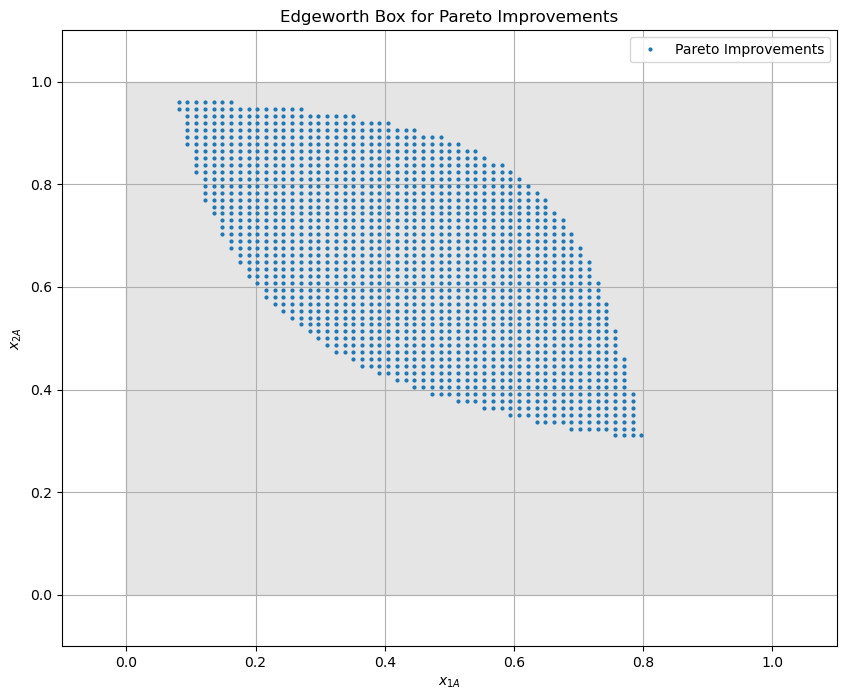

In [2]:
#Starting with refering to utillity-functions and conditions:
import matplotlib.pyplot as plt 

# Initialize the exchange economy
economy = ExchangeEconomyClass()

# Calculate the utility at endowment for both A and B
utility_endowment_A = economy.utility_A(economy.par.w1A, economy.par.w2A)
utility_endowment_B = economy.utility_B(1 - economy.par.w1A, 1 - economy.par.w2A)

# Discretize the space
N = 75
x1A_values = np.linspace(0, 1, N)
x2A_values = np.linspace(0, 1, N)

# Initialize lists to hold Pareto improvements
pareto_x1A = []
pareto_x2A = []

# Check each combination
for x1A in x1A_values:
    for x2A in x2A_values:
        x1B = 1 - x1A
        x2B = 1 - x2A

        # Calculate utilities
        utility_A = economy.utility_A(x1A, x2A)
        utility_B = economy.utility_B(x1B, x2B)

        # Check if both A and B are at least as well off
        if utility_A >= utility_endowment_A and utility_B >= utility_endowment_B:
            pareto_x1A.append(x1A)
            pareto_x2A.append(x2A)

# Plot the Pareto improvements in the Edgeworth box
plt.figure(figsize=(10, 8))
plt.plot(pareto_x1A, pareto_x2A, 'o', markersize=2, label='Pareto Improvements')
plt.title('Edgeworth Box for Pareto Improvements')
plt.xlabel('$x_{1A}$')
plt.ylabel('$x_{2A}$')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.grid(True)
black_box = plt.Rectangle((0, 0), 1, 1, facecolor='black', edgecolor='black', alpha=0.1)  # alpha controls transparency
plt.gca().add_patch(black_box)
plt.show()

# Question 2

We use the same precedure.

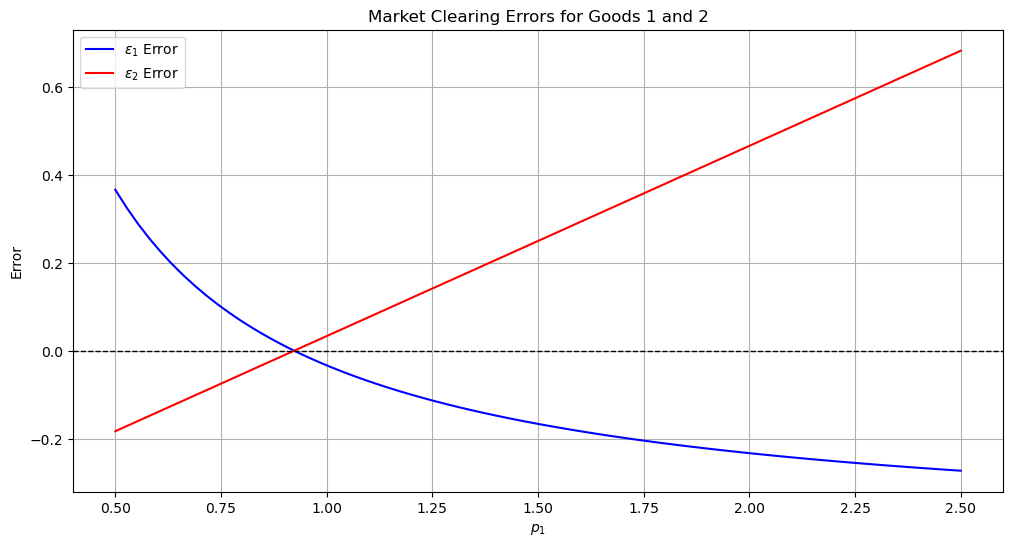

(0.9324324324324325, 0.008401880141010898)

In [3]:
# Initialize the economy
economy = ExchangeEconomyClass()

# Set up the price range
N = 75  # Number of price points
P1 = np.linspace(0.5, 2.5, N)

# Perform the calculations by using echanging economy
market_clearing_errors = []
for p1 in P1:
    eps1, eps2 = economy.check_market_clearing(p1)
    market_clearing_errors.append((p1, eps1, eps2))

# Unpack the results for plotting
prices, errors_eps1, errors_eps2 = zip(*market_clearing_errors)

# Combine the plots for both errors
plt.figure(figsize=(12, 6))
plt.plot(prices, errors_eps1, label='$\epsilon_1$ Error', color='blue')
plt.plot(prices, errors_eps2, label='$\epsilon_2$ Error', color='red')
plt.title('Market Clearing Errors for Goods 1 and 2')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.axhline(0, color='black', lw=1, ls='--')  # Reference line at error = 0
plt.grid(True)
plt.legend()
plt.show()

# Calculate the price p1 that minimizes the sum of the absolute errors
absolute_errors_sum = [abs(e1) + abs(e2) for e1, e2 in zip(errors_eps1, errors_eps2)]
min_error_index = np.argmin(absolute_errors_sum)
optimal_p1 = prices[min_error_index]
min_error = absolute_errors_sum[min_error_index]

optimal_p1, min_error

# Question 3

We use the same precedure and finds the market clearing price to be 0.9230769230769281

In [4]:
# Initialize the economy
economy = ExchangeEconomyClass()

# Define the excess demand function for good 1
def excess_demand_good_1(p1):
    eps1, _ = economy.check_market_clearing(p1)
    return eps1

# Use the Brent method to find the market clearing price of good 1, p1
market_clearing_price_p1 = brentq(excess_demand_good_1, 0.01, 5)  # Search between 0.01 and 5

market_clearing_price_p1

0.9230769230769281

# Question 4a


As A choses the price we now begin by using A to maximize and let B have the rest.

In [5]:
# Initialize the economy
economy = ExchangeEconomyClass()

# Set up the price range
N = 75  # Number of price points
P1 = np.linspace(0.5, 2.5, N)
# Set up the empty sets
max_utility =  -np.inf
best_p1 = np.nan

# Running the max loop
for p1 in P1:
    x1B, x2B = economy.demand_B(p1)
    x1A = 1-x1B
    x2A = 1-x2B

    utility = economy.utility_A(x1A, x2A)
    if utility > max_utility:
        max_utility = utility
        best_p1 = p1
        best_x1A = x1A
        best_x2A = x2A
# Extracting the distribution
xA = economy.demand_A(best_p1)
xB = economy.demand_B(best_p1)
# Prints the parameters
print("Maximum utility A:", max_utility)
print("Optimal p1:", best_p1)
print("x1A and x2A", xA)
print("x1B and x2B", xB )

Maximum utility A: 0.5892372286898085
Optimal p1: 0.7702702702702703
x1A and x2A (0.4461988304093567, 0.6873873873873875)
x1B and x2B (0.6397660818713449, 0.24639639639639638)


# Question 4b


Same procedure as before.

In [6]:
# Initialize the economy
economy = ExchangeEconomyClass()


# Define the objective function to be maximized
def objective_function(p1):
    x1B, x2B = economy.demand_B(p1)
    x1A = 1 - x1B
    x2A = 1 - x2B
    return -economy.utility_A(x1A, x2A)  # We use negative sign as we're maximizing

# Find the optimal price using scipy's minimize function
result = minimize(objective_function, x0=1, bounds=[(1, None)])

# Extracting the distribution
best_p1 = result.x[0]
xA = economy.demand_A(best_p1)
xB = economy.demand_B(best_p1)

# Prints the parameters
print("Maximum utility A:", -result.fun)  # Negate the result to get the actual maximum utility
print("Optimal p1:", best_p1)
print("x1A and x2A", xA)
print("x1B and x2B", xB)

Maximum utility A: 0.5808785733563705
Optimal p1: 1.0
x1A and x2A (0.3666666666666667, 0.7333333333333335)
x1B and x2B (0.5999999999999999, 0.3)


# Question 5a

We now impose the restriction of C.

In [7]:
# Initialize the exchange economy
economy = ExchangeEconomyClass()

# Calculate the utility at endowment for both A and B
utility_endowment_A = economy.utility_A(economy.par.w1A, economy.par.w2A)
utility_endowment_B = economy.utility_B(1 - economy.par.w1A, 1 - economy.par.w2A)

# Discretize the space
N = 75
x1A_values = np.linspace(0, 1, N)
x2A_values = np.linspace(0, 1, N)
best_utility_A = -np.inf
best_x1A = np.nan
best_x2A = np.nan

# Check each combination
for x1A in x1A_values:
    for x2A in x2A_values:
        x1B = 1 - x1A
        x2B = 1 - x2A

        # Calculate utilities
        utility_A = economy.utility_A(x1A, x2A)
        utility_B = economy.utility_B(x1B, x2B)

        # Check if both A and B are at least as well off
        if utility_A >= utility_endowment_A and utility_B >= utility_endowment_B:
            if utility_A > best_utility_A:
                best_utility_A = utility_A
                best_x1A = x1A
                best_x2A = x2A

#print the results
print("Max utility A:", best_utility_A)
print("A's amount of good 1:",best_x1A)
print("A's amount of good 2:",best_x2A)

Max utility A: 0.741627044262768
A's amount of good 1: 0.5810810810810811
A's amount of good 2: 0.8378378378378379


# Question 5b

Now there is no restriction.

In [8]:
# Initialize the exchange economy
economy = ExchangeEconomyClass()
from scipy.optimize import minimize
# Calculate the utility at endowment for both A and B
utility_endowment_A = economy.utility_A(economy.par.w1A, economy.par.w2A)
utility_endowment_B = economy.utility_B(1 - economy.par.w1A, 1 - economy.par.w2A)

# Define the objective function to be maximized
def objective_function(x):
    return -economy.utility_A(x[0], x[1])  # We use negative sign as we're maximizing

# Define a constraint function to make sure the amount of good 1 and 2 for B is feasible
def constraint(x):
    return economy.utility_B(1-x[0], 1-x[1]) - utility_endowment_B

# Initial guess
x0 = [0.5 , 0.8]

#Bounds 
bounds = [(0,1), (0,1)]

# Define constraint dictionary
constraint_dict = {'type' : 'ineq' , 'fun' : constraint}

#Optimize
results = minimize(objective_function, x0, bounds=bounds, constraints=constraint_dict)

# Extracting the results
optimal_xA1, optimal_xA2 = results.x
max_utilityA = -results.fun


print("Optimal xA1:",optimal_xA1)
print("Optimal xA2:",optimal_xA2)
print("Max Utility A:",max_utilityA)

Optimal xA1: 0.5757441199759936
Optimal xA2: 0.8444385265007078
Max Utility A: 0.7432276586994013


# Question 6a

Instead of maximzing by A, we now let a social planner do the work, by using an objetive function to maximize both A and Bs utility.

In [9]:
# Initialize the exchange economy
economy = ExchangeEconomyClass()

# Define the objective function to be maximized
def objective_function(x):
    return -economy.utility_A(x[0], x[1]) - economy.utility_B(x[2], x[3])  # We use negative sign as we're maximizing

#We define a constraint function
def constraint(x):
    return x[0]+x[2] -1 , x[1]+x[3] - 1

# Initial guess
x0 = [0.5 , 0.8, 0.5, 0.2]

#Bounds 
bounds = [(0,1), (0,1),(0,1), (0,1)]

# Define constraint dictionary
constraint_dict = {'type' : 'eq' , 'fun' : constraint}

#Optimize
results = minimize(objective_function, x0, bounds=bounds, constraints=constraint_dict)

# Extracting the results
Ax1, Ax2, Bx1, Bx2 = results.x
optimal_total_utility= -results.fun

print("SP max utility:",optimal_total_utility)
print("A's amount of good 1:", Ax1)
print("A's amount of good 2:", Ax2)
print("B's amount of good 1:", Bx1)
print("B's amount of good 2:", Bx2)

SP max utility: 1.0582673633060038
A's amount of good 1: 0.33345316579216794
A's amount of good 2: 0.6668060561967794
B's amount of good 1: 0.6665468342078321
B's amount of good 2: 0.33319394380322076


# Question 6b

In [10]:
# Initialize the exchange economy
economy = ExchangeEconomyClass()

# We calculate the total utility of Q4a using the found coefficients: x1A and x2A (0.4461988304093567, 0.6873873873873875) and: x1B and x2B (0.6397660818713449, 0.24639639639639638)
total_utility_4a = economy.utility_A(0.4461988304093567, 0.6873873873873875) + economy.utility_B(0.639766081871344,  0.24639639639639638)

# We calculate the total utility of Q4b using the found coefficients: x1A and x2A (0.3666666666666667, 0.7333333333333335) and: x1B and x2B (0.5999999999999999, 0.3)
total_utility_4b = economy.utility_A(0.3666666666666667, 0.7333333333333335) + economy.utility_B(0.5999999999999999,  0.3)

# We calculate the total utility of Q5a using the found coefficients: A's amount of good 1: 0.5810810810810811 And: A's amount of good 2: 0.8378378378378379
A_amount_of_good_1 = 0.5810810810810811
A_amount_of_good_2 = 0.8378378378378379
B_amount_of_good_1 = 1 - A_amount_of_good_1
B_amount_of_good_2 = 1 - A_amount_of_good_2
total_utility_5a = economy.utility_A(A_amount_of_good_1, A_amount_of_good_2) + economy.utility_B(B_amount_of_good_1, B_amount_of_good_2)

# We calculate the total utility of Q5b using the found coefficients: Optimal xA1: 0.5757441199759936 And: Optimal xA2: 0.8444385265007078
Optimal_A1Q5b = 0.5757441199759936
Optimal_A2Q5b = 0.8444385265007078
Optimal_B1Q5b = 1 - Optimal_A1Q5b
Optimal_B2Q5b = 1 - Optimal_A2Q5b
total_utility_5b = economy.utility_A(Optimal_A1Q5b, Optimal_A2Q5b) + economy.utility_B(Optimal_B1Q5b, Optimal_B2Q5b)

# We calculate the total utility of Q6a using the found coefficients: A's amount of good 1: 0.33345316579216794 A's amount of good 2: 0.6668060561967794 B's amount of good 1: 0.6665468342078321 B's amount of good 2: 0.33319394380322076
total_utility_6a = economy.utility_A(0.33345316579216794, 0.6668060561967794) + economy.utility_B(0.6665468342078321, 0.33319394380322076)

print("Total utility 4a:",total_utility_4a)
print("Total utility 4b:",total_utility_4b)
print("Total utility 5a:",total_utility_5a)
print("Total utility 5b:",total_utility_5b)
print("Total utility 6a:",total_utility_6a)


Total utility 4a: 1.0606444630699383
Total utility 4b: 1.0582673679787997
Total utility 5a: 1.0469338542454911
Total utility 5b: 1.0468864993034555
Total utility 6a: 1.0582673633060038


From our results above we can see that the highest utility is gained gained from the discrete set in 4a, and this could be the results of rounding errors and floats.
Otherwise, then the approaches which maximizes the aggregate utility is through having a social planner, and by letting one of the agents maximize her own utility through the prices, under a pareto constraint.
Meanwhile letting A decide the distribution directly lowers the total utility, as there now is no incentive for a to increase the utility of B, as they before both would gain the rewards from a lower price on good 1.

# Question 7

We use np.random to sample 50 elements.

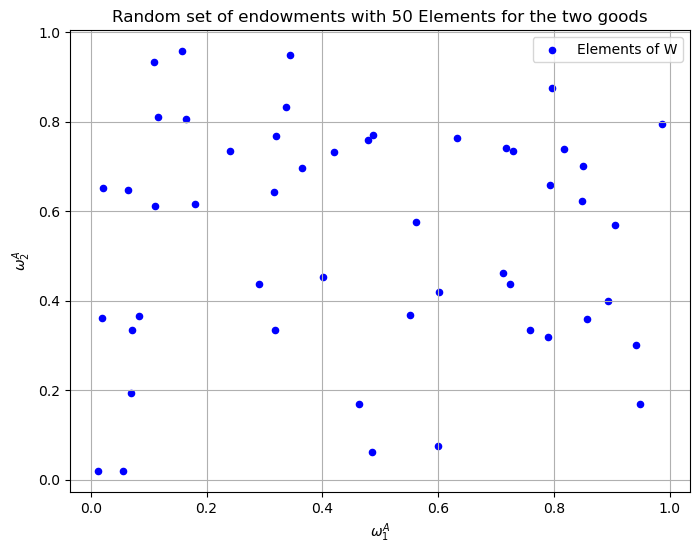

In [11]:
def draw_set_W(n=50):

    # Set the random seed for reproducibility
    np.random.seed(11)

    # Generate n random values for ω1A and ω2A from a uniform distribution over [0, 1]
    omega_1A = np.random.uniform(0, 1, n)
    omega_2A = np.random.uniform(0, 1, n)

    # Zip the two arrays together to form n tuples (ω1A, ω2A)
    W = list(zip(omega_1A, omega_2A))

    # Plotting the elements of set W
    plt.figure(figsize=(8, 6))
    plt.scatter(*zip(*W), c='blue', marker='o', s=20, label='Elements of W')
    plt.title('Random set of endowments with {} Elements for the two goods'.format(n))
    plt.xlabel('$\omega_1^A$')
    plt.ylabel('$\omega_2^A$')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function to generate and plot the set W
draw_set_W(n=50)


# Question 8


We now find and plot the equilibrium from before.

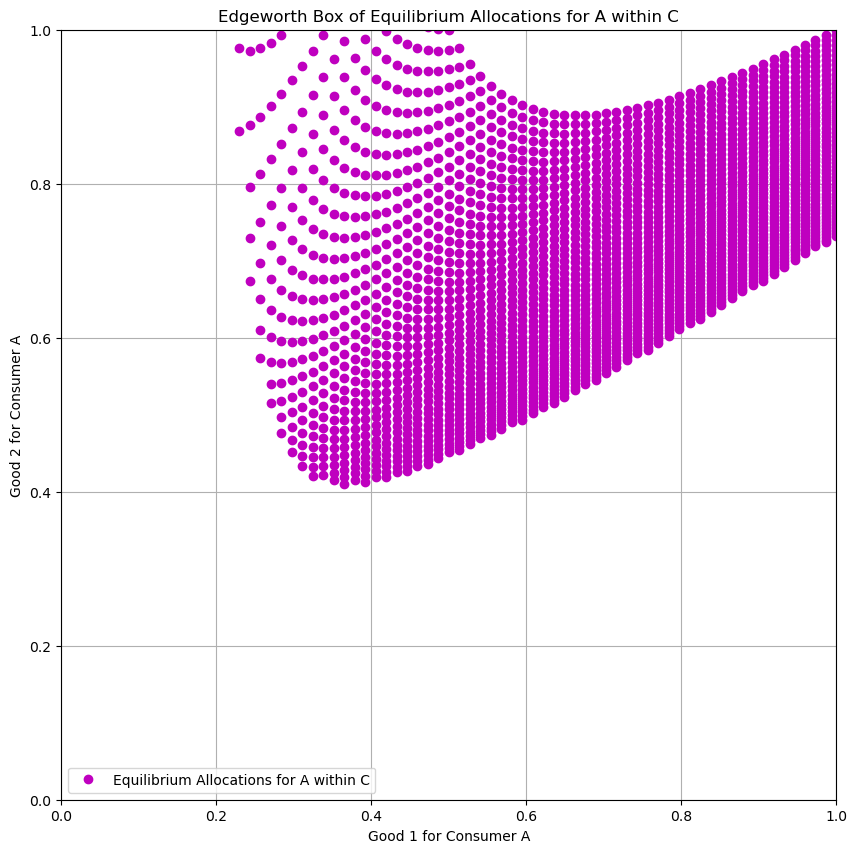

In [13]:
# We redefine the class to include the utility functions and the market clearing function
class ExchangeEconomyClass:
    def __init__(self, w1A, w2A):
        par = self.par = SimpleNamespace()
        par.alpha = 1/3
        par.beta = 2/3
        par.w1A = w1A
        par.w2A = w2A

    def utility_A(self, x1A, x2A):
        return x1A**self.par.alpha * x2A**(1 - self.par.alpha)

    def demand_A(self, p1):
        p2 = 1  # Numeraire
        x1A = self.par.alpha / p1 * (self.par.w1A + p1/p2 * self.par.w2A)
        x2A = (1 - self.par.alpha) / p2 * (self.par.w1A + p1/p2 * self.par.w2A)
        return x1A, x2A

    def check_market_clearing(self, p1):
        x1A, _ = self.demand_A(p1)
        eps1 = x1A - self.par.w1A  # Simplified market clearing for good 1, assuming symmetry
        return eps1**2  # Using squared error for numerical stability

# Define a function to find the equilibrium price
def find_equilibrium_price(w1A, w2A):
    economy = ExchangeEconomyClass(w1A, w2A)
    res = minimize_scalar(economy.check_market_clearing, bounds=(0.01, 10), method='bounded')
    p1_eq = res.x
    x1A, x2A = economy.demand_A(p1_eq)
    return (x1A, x2A)

# Initial economy setup with base endowments
economy_base = ExchangeEconomyClass(0.8, 0.3)
utility_A_threshold = economy_base.utility_A(0.8, 0.3)

# Define C
N = 75
x1A_grid, x2A_grid = np.linspace(0, 1, N), np.linspace(0, 1, N)
C_mask_A = np.zeros((N, N), dtype=bool)

# Identifying allocations within C for A
for i, x1A in enumerate(x1A_grid):
    for j, x2A in enumerate(x2A_grid):
        if economy_base.utility_A(x1A, x2A) >= utility_A_threshold:
            C_mask_A[i, j] = True

# Finding equilibrium allocations for A within C
equilibrium_allocations_A = []
for i in range(N):
    for j in range(N):
        if C_mask_A[i, j]:
            x1A, x2A = x1A_grid[i], x2A_grid[j]
            equilibrium_allocations_A.append(find_equilibrium_price(x1A, x2A))

# Convert to numpy array for plotting
equilibrium_allocations_A = np.array(equilibrium_allocations_A)

# Plotting
plt.figure(figsize=(10, 10))
plt.plot(equilibrium_allocations_A[:, 0], equilibrium_allocations_A[:, 1], 'mo', label='Equilibrium Allocations for A within C')
plt.title('Edgeworth Box of Equilibrium Allocations for A within C')
plt.xlabel('Good 1 for Consumer A')
plt.ylabel('Good 2 for Consumer A')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()
